# Baselines for Deep Learning Approaches

In this notebook, simple baselines are established for wildfire, landslides and floods using Random Forest Regression. The results will later be compared against the deep learning performance to establish the improvement relative to simple machine learning methods.

In [ ]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pwd

/Users/jeremypalmerio/Repos/MasterThesis


## Wildfires

In [3]:
# files to : load temperature_daily, NDVI, landcover, elevation, wind_speed, fire_weather, soil_moisture(root or surface)

# List your file paths
signal_paths = [
    "Input/Europe/downsampled_arrays/masked_NDVI_Europe_flat_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_temperature_daily_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_landcover_Europe_flat_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_elevation_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_wind_speed_daily_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_fire_weather_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_soil_moisture_surface_Europe_downsampled.npy",
]

# Load them into a feature matrix
X = np.stack([np.load(p) for p in signal_paths], axis=1)  # shape: [num_samples, num_features]

# Load the wildfire counts at those same sampled points
wildfire_counts = np.load("Input/Europe/downsampled_arrays/masked_wildfire_Europe_downsampled.npy").astype(float)

In [9]:
# shapes of the data
print("X shape:", X.shape)
print("wildfire_counts shape:", wildfire_counts.shape)
# Check for NaN values in the features and target
print("NaN values in features:", np.isnan(X).sum())
print("NaN values in target:", np.isnan(wildfire_counts).sum())

# Remove cells with NaN values in the features or target
valid_mask = ~np.isnan(X).any(axis=1) & ~np.isnan(wildfire_counts)
X = X[valid_mask]
wildfire_counts = wildfire_counts[valid_mask]
print("X shape after removing NaNs:", X.shape)
print("wildfire_counts shape after removing NaNs:", wildfire_counts.shape)



X shape: (2103439, 7)
wildfire_counts shape: (2103439,)
NaN values in features: 376024
NaN values in target: 0
X shape after removing NaNs: (1840270, 7)
wildfire_counts shape after removing NaNs: (1840270,)


In [10]:
# Normalize wildfire count to 0–1
y = wildfire_counts / (wildfire_counts.max() + 1e-5)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,             # Limit tree depth
    min_samples_split=10,     # Avoid overfitting on tiny splits
    min_samples_leaf=5,       # Each leaf must have at least 5 samples
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_jobs=-1, random_state=42)

In [52]:
# Test set predictions and evaluation

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Train set predictions and evaluation

y_train_pred = model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Train MAE:", train_mae)
print("Train R²:", train_r2)

Mean Absolute Error (MAE): 0.006157953553871916
R² Score: 0.3492556459878071
Train MAE: 0.0060845896202584345
Train R²: 0.3616371845849484


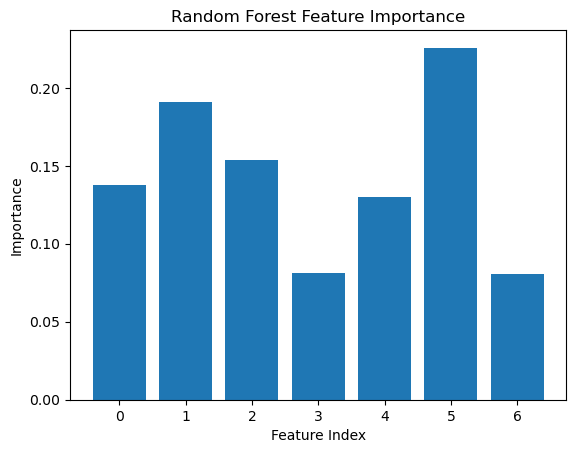

In [50]:
importances = model.feature_importances_
plt.bar(range(X.shape[1]), importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")

plt.show()

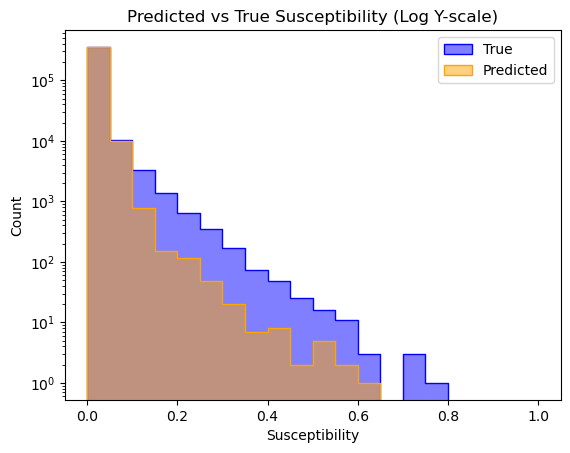

In [ ]:


bin_edges = np.arange(0, 1.005, 0.05)
sns.histplot(y_test, bins=bin_edges, label="True", color="blue", stat="count", element="step", alpha=0.5)
sns.histplot(y_pred, bins=bin_edges, label="Predicted", color="orange", stat="count", element="step", alpha=0.5)

plt.yscale('log')
plt.xlabel("Susceptibility")
plt.ylabel("Count")
plt.title("Predicted vs True Susceptibility (Log Y-scale)")
plt.legend()

plt.show()

## Floods

In [ ]:
# files to load :  slope, curvature, aspect, accuflux, NDVI, landcover, precipitation_daily, GLIM, rivers, HWSD, pga

# List your file paths
signal_paths = [
    "Input/Europe/downsampled_arrays/masked_slope_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_curvature_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_aspect_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_accuflux_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_NDVI_Europe_flat_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_landcover_Europe_flat_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_precipitation_daily_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_GLIM_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_rivers_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_HWSD_Europe_downsampled.npy",
    "Input/Europe/downsampled_arrays/masked_pga_Europe_downsampled.npy",
]

# Load them into a feature matrix
X = np.stack([np.load(p) for p in signal_paths], axis=1)  # shape: [num_samples, num_features]

# STILL MISSING FLOOD LABELS
wildfire_counts = np.load("Input/Europe/downsampled_arrays/masked_wildfire_Europe_downsampled.npy").astype(float)